# IMPORT-IMPORT

In [95]:
!pip3 install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn import preprocessing
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVDpp
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

# Bersih-bersih Data

In [97]:
#Data
"https://drive.google.com/file/d/1h3L49jcc3kNteHXEUugVZ_rPeJOm_N2Q/view?usp=sharing"

!gdown --id 1h3L49jcc3kNteHXEUugVZ_rPeJOm_N2Q

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1h3L49jcc3kNteHXEUugVZ_rPeJOm_N2Q
To: /content/DataTAAAA.csv
100% 69.1k/69.1k [00:00<00:00, 65.0MB/s]


In [98]:
df_dataFilm = pd.read_csv("DataTAAAA.csv")
df_dataFilm

,nama film,habisnontonfilm,rayculz,djaycoholyc,cenayangfilm,hafilova,cinemuach,watchmenid,moviemenfes,tarizsolis,...,moviegoersid,rivki_mogi,arulfittron,danieldokter,elbert_reyner,rottentomatoes tomato meter,rottentomatoes audience score,imdb,metacritic metascore,metacritic user score
0,Words Bubble Up Like Soda Pop,0.00,0.00,0.00,0.00,0.00,0.00,4.00,3.50,3.20,...,3.69,0.00,0.00,0.00,0.00,5.00,4.40,3.45,0.00,0.00
1,Gunpowder Milkshake,2.65,0.00,3.50,2.50,2.70,0.00,3.38,3.03,0.00,...,0.00,0.00,3.00,3.75,2.90,2.95,2.35,3.00,4.25,3.75
2,Wind River,0.00,0.00,0.00,3.38,4.00,3.75,0.00,2.34,0.00,...,0.00,2.50,3.31,2.94,3.17,4.35,4.50,3.85,3.65,3.95
3,Man in Love,2.92,0.00,0.00,0.00,2.89,0.00,0.00,4.00,2.10,...,0.00,3.75,0.00,2.92,3.00,0.00,0.00,3.50,0.00,0.00
4,Black Island,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.80,2.60,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,Revolutionary Road,0.00,0.00,3.41,0.00,0.00,0.00,0.00,2.17,1.83,...,0.00,0.00,0.00,3.00,0.00,3.35,3.55,3.65,3.45,3.70
639,Righteous Kill,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.50,...,0.00,0.00,0.00,2.46,0.00,0.90,1.85,3.00,1.80,2.45
640,Get Smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.55,3.35,3.25,2.70,3.45
641,Friday the 13th,2.44,2.92,3.33,2.42,0.00,0.00,0.00,3.50,4.50,...,0.00,0.00,0.00,4.25,0.00,1.30,2.30,2.75,1.70,3.15


In [99]:
df_coba = df_dataFilm.set_index('nama film')
mtrx_dataFilm = df_coba.to_numpy()
mtrx_dataFilm

array([[0.  , 0.  , 0.  , ..., 3.45, 0.  , 0.  ],
       [2.65, 0.  , 3.5 , ..., 3.  , 4.25, 3.75],
       [0.  , 0.  , 0.  , ..., 3.85, 3.65, 3.95],
       ...,
       [0.  , 0.  , 0.  , ..., 3.25, 2.7 , 3.45],
       [2.44, 2.92, 3.33, ..., 2.75, 1.7 , 3.15],
       [0.  , 0.  , 3.5 , ..., 2.55, 2.05, 2.25]])

In [100]:
df_dataFilm2 = pd.melt(df_dataFilm, id_vars=["nama film"], 
                  var_name="User", value_name="Rating")
df_dataFilm2

,nama film,User,Rating
0,Words Bubble Up Like Soda Pop,habisnontonfilm,0.00
1,Gunpowder Milkshake,habisnontonfilm,2.65
2,Wind River,habisnontonfilm,0.00
3,Man in Love,habisnontonfilm,2.92
4,Black Island,habisnontonfilm,0.00
...,...,...,...
22500,Revolutionary Road,metacritic user score,3.70
22501,Righteous Kill,metacritic user score,2.45
22502,Get Smart,metacritic user score,3.45
22503,Friday the 13th,metacritic user score,3.15


# ANALISA DESKRIPTIF

In [101]:
n_users = len(df_dataFilm2['User'].unique())
n_items = len(df_dataFilm2['nama film'].unique())
R_shape = (n_users, n_items)
print(str(n_users) + ' users')
print(str(n_items) + ' items')

35 users
643 items


In [102]:
df_dataFilm2['Rating'].describe()

count    22505.000000
mean         0.747867
std          1.366432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of ratings')

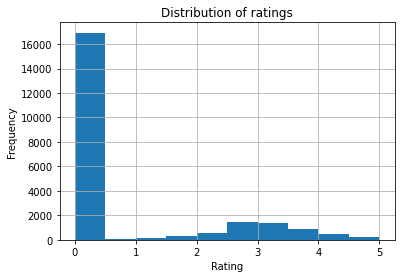

In [103]:
df_dataFilm2['Rating'].hist(grid=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of ratings')

In [104]:
count = (df_dataFilm2['Rating'] == 0).sum()
print('Count of 0 in Column  Rating : ', count)

Count of 0 in Column  Rating :  16915


In [105]:
# Copy Dulu
df_dataFilmOlah = df_dataFilm2.copy()

In [106]:
item_info = df_dataFilmOlah['nama film']
item_info.head()

0    Words Bubble Up Like Soda Pop
1              Gunpowder Milkshake
2                       Wind River
3                      Man in Love
4                     Black Island
Name: nama film, dtype: object

In [107]:
df_dataFilmOlah

,nama film,User,Rating
0,Words Bubble Up Like Soda Pop,habisnontonfilm,0.00
1,Gunpowder Milkshake,habisnontonfilm,2.65
2,Wind River,habisnontonfilm,0.00
3,Man in Love,habisnontonfilm,2.92
4,Black Island,habisnontonfilm,0.00
...,...,...,...
22500,Revolutionary Road,metacritic user score,3.70
22501,Righteous Kill,metacritic user score,2.45
22502,Get Smart,metacritic user score,3.45
22503,Friday the 13th,metacritic user score,3.15


In [108]:
#df_dataFilmOlah[df_dataFilmOlah["Rating"]==5]

In [109]:
df_dataFilmOlah.describe()

,Rating
count,22505.000000
mean,0.747867
std,1.366432
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


In [110]:
"""
X = df_dataFilmOlah[['nama film', 'User']].values
y = df_dataFilmOlah['Rating'].values
print('X')
print(X)
print('y')
print(y)
"""

"\nX = df_dataFilmOlah[['nama film', 'User']].values\ny = df_dataFilmOlah['Rating'].values\nprint('X')\nprint(X)\nprint('y')\nprint(y)\n"

In [111]:
#Sparsity Matrix R
print(len(mtrx_dataFilm.nonzero()[0]) / float(mtrx_dataFilm.shape[0] * mtrx_dataFilm.shape[1]))

0.24838924683403688


Sparsity Sekitar 24%

In [112]:
test_mat = pd.DataFrame(mtrx_dataFilm)
test_mat

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,3.50,3.20,0.00,...,3.69,0.00,0.00,0.00,0.00,5.00,4.40,3.45,0.00,0.00
1,2.65,0.00,3.50,2.50,2.70,0.00,3.38,3.03,0.00,3.58,...,0.00,0.00,3.00,3.75,2.90,2.95,2.35,3.00,4.25,3.75
2,0.00,0.00,0.00,3.38,4.00,3.75,0.00,2.34,0.00,2.50,...,0.00,2.50,3.31,2.94,3.17,4.35,4.50,3.85,3.65,3.95
3,2.92,0.00,0.00,0.00,2.89,0.00,0.00,4.00,2.10,2.50,...,0.00,3.75,0.00,2.92,3.00,0.00,0.00,3.50,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.80,2.60,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,0.00,0.00,3.41,0.00,0.00,0.00,0.00,2.17,1.83,0.00,...,0.00,0.00,0.00,3.00,0.00,3.35,3.55,3.65,3.45,3.70
639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.50,0.00,...,0.00,0.00,0.00,2.46,0.00,0.90,1.85,3.00,1.80,2.45
640,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.55,3.35,3.25,2.70,3.45
641,2.44,2.92,3.33,2.42,0.00,0.00,0.00,3.50,4.50,2.50,...,0.00,0.00,0.00,4.25,0.00,1.30,2.30,2.75,1.70,3.15


# Probabilistic Matrix Factorization

In [113]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_dataFilmOlah[['User', 'nama film', 'Rating']], reader)

In [114]:
pmf = SVD(biased = False)
cross_validate(pmf, data, measures=['RMSE', 'MAE'], verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1974  1.1758  1.1810  1.1953  1.1962  1.1891  0.0090  
MAE (testset)     1.1012  1.0884  1.0932  1.1005  1.1004  1.0967  0.0051  
Fit time          1.20    1.05    1.19    1.04    2.08    1.31    0.39    
Test time         0.02    0.03    0.03    0.03    0.05    0.03    0.01    


{'fit_time': (1.1974358558654785,
  1.0547411441802979,
  1.191648006439209,
  1.0391631126403809,
  2.0771191120147705),
 'test_mae': array([1.10124807, 1.0883553 , 1.09321413, 1.10049148, 1.10038285]),
 'test_rmse': array([1.19740552, 1.17576912, 1.18095178, 1.19527346, 1.19619382]),
 'test_time': (0.024446725845336914,
  0.025418758392333984,
  0.025629758834838867,
  0.026100873947143555,
  0.045873403549194336)}

In [115]:
trainset, testset = train_test_split(data, test_size=.25)
pmf.fit(trainset)
predictions = pmf.test(testset)

In [116]:
df_pmf = pd.DataFrame(predictions)
df_pmf = df_pmf.rename(columns = {'uid':'user_id', 'iid':'movies_id', 'r_ui':'rating'})
df_pmf = df_pmf.drop(columns = {'est', 'details'})

In [117]:
df_pmf.to_csv('Cobaaaa.csv', index=False)

In [118]:
df_pmf

,user_id,movies_id,rating
0,rottentomatoes audience score,Ma Rainey's Black Bottom,3.60
1,rottentomatoes tomato meter,Swiss Army Man,3.60
2,moviemanid,Snowpiercer,3.05
3,commaditya,The Bling Ring,0.00
4,rivki_mogi,The Hard Way,0.00
...,...,...,...
5622,sinema911,The Saint,0.00
5623,rottentomatoes audience score,Athlete A,4.65
5624,rottentomatoes tomato meter,Wind River,4.35
5625,watchmenid,Pineapple Express,0.00


In [119]:
count = (df_pmf['rating'] == 0).sum()
print('Count of 0 in Column  Rating : ', count)

Count of 0 in Column  Rating :  4199


In [120]:
mtrx_tesssss = df_pmf['rating'].to_numpy()
mtrx_tesssss

array([3.6 , 3.6 , 3.05, ..., 4.35, 0.  , 0.  ])

In [121]:
#sparsity = 1.0 - ( count_nonzero(mtrx_tesssss) / float(mtrx_tesssss.size) )
#print(sparsity)

Text(0.5, 1.0, 'Distribution of ratings')

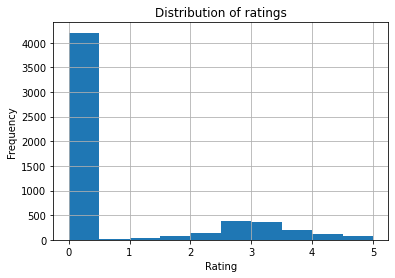

In [122]:
df_pmf['rating'].hist(grid=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of ratings')

In [123]:
df_pmf.describe()

,rating
count,5627.000000
mean,0.761868
std,1.376452
min,0.000000
25%,0.000000
50%,0.000000
75%,0.900000
max,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


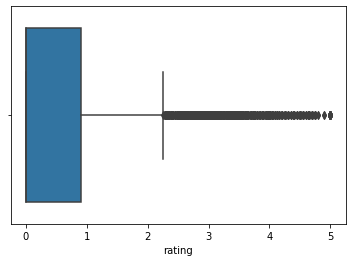

In [124]:
import seaborn as sns

sns.boxplot(df_pmf['rating'])

In [125]:
"""
for x in ['rating']:
    q75,q25 = np.percentile(df_pmf.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_pmf.loc[df_pmf[x] < min,x] = np.nan
    df_pmf.loc[df_pmf[x] > max,x] = np.nan
"""

"\nfor x in ['rating']:\n    q75,q25 = np.percentile(df_pmf.loc[:,x],[75,25])\n    intr_qr = q75-q25\n \n    max = q75+(1.5*intr_qr)\n    min = q25-(1.5*intr_qr)\n \n    df_pmf.loc[df_pmf[x] < min,x] = np.nan\n    df_pmf.loc[df_pmf[x] > max,x] = np.nan\n"

In [126]:
#df_pmf.isnull().sum()

In [127]:
#df_pmf = df_pmf.dropna(axis = 0)

In [128]:
def ConvertToDense(X, y, shape):  # from R=(X,y), in sparse format 
    row  = X[:,0]
    col  = X[:,1]
    data = y
    matrix_sparse = sparse.csr_matrix((data,(row,col)), shape=(shape[1]+1,shape[0]+1))  # sparse matrix in compressed format (CSR)
    R = matrix_sparse.todense()   # convert sparse matrix to dense matrix, same as: matrix_sparse.A
    R = R[1:,1:]                  # removing the "Python starts at 0" offset
    R = np.asarray(R)             # convert matrix object to ndarray object
    return R

In [129]:
#Encoding

fg_namafilm = LabelEncoder()
fg_namafilm.fit(df_pmf['movies_id'])

encode_fg_namafilm = fg_namafilm.transform(df_pmf['movies_id'])
df_pmf['movies_id'] = encode_fg_namafilm

fg_User = LabelEncoder()
fg_User.fit(df_pmf['user_id'])

encode_fg_User = fg_User.transform(df_pmf['user_id'])
df_pmf['user_id'] = encode_fg_User

In [130]:
X_PMF = df_pmf[['movies_id', 'user_id']].values
y_PMF = df_pmf['rating'].values

In [131]:
matrix_PMF = ConvertToDense(X_PMF, y_PMF, R_shape)
matrix_PMF

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
from numpy import count_nonzero
sparsity = 1.0 - ( count_nonzero(matrix_PMF) / float(matrix_PMF.size) )
print(sparsity)

0.9370806487447234


# Hyperparameter Tuning : RANDOM FOREST & Evaluation

In [133]:
#SPLIT DATA Train, Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PMF, y_PMF, test_size=0.2) #Size= 30%

R_train = ConvertToDense(X_train, y_train, R_shape)
R_test = ConvertToDense(X_test, y_test, R_shape)

print('Matrix R_train')
print(R_train)
print(R_train.shape)
print
print('Matrix R_test')
print(R_test)
print(R_test.shape)

Matrix R_train
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(643, 35)
Matrix R_test
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(643, 35)


Random Forest

In [134]:
n_estimators_list = [50,100, 150, 200, 250,300]

In [135]:
#RF Data Test
rmse_result_rftest =[]
mae_result_rftest =[]
for i in n_estimators_list:
  rf = RandomForestRegressor(n_estimators=i)
  rf.fit(X_train, y_train)
  test_pred_y = rf.predict(X_test)
  mse = mean_squared_error(y_test, test_pred_y)
  rmse_rf = mse**.5
  mae_rf = mean_absolute_error(y_test, test_pred_y)
  print("number of trees: ",i)
  print("Root Mean Square Error (RMSE) data test:")
  rmse_result_rftest.append(rmse_rf) 
  print(rmse_rf)
  print
  print("Mean Absolute Error (MAE) data test:")
  mae_result_rftest.append(mae_rf)
  print(mae_rf)

number of trees:  50
Root Mean Square Error (RMSE) data test:
1.315525496484402
Mean Absolute Error (MAE) data test:
0.8041756660746003
number of trees:  100
Root Mean Square Error (RMSE) data test:
1.323194252409387
Mean Absolute Error (MAE) data test:
0.8096079928952042
number of trees:  150
Root Mean Square Error (RMSE) data test:
1.3152101182792042
Mean Absolute Error (MAE) data test:
0.8054001776198934
number of trees:  200
Root Mean Square Error (RMSE) data test:
1.3168301764250074
Mean Absolute Error (MAE) data test:
0.8063321492007103
number of trees:  250
Root Mean Square Error (RMSE) data test:
1.3166298176137
Mean Absolute Error (MAE) data test:
0.8061103374777975
number of trees:  300
Root Mean Square Error (RMSE) data test:
1.3160539494738785
Mean Absolute Error (MAE) data test:
0.8071429248075782


In [136]:
#RF Data Train
rmse_result_rftrain =[]
mae_result_rftrain =[]
for i in n_estimators_list:
  rf = RandomForestRegressor(n_estimators=i)
  rf.fit(X_train, y_train)
  train_pred_y = rf.predict(X_train)
  mse = mean_squared_error(y_train, train_pred_y)
  rmse = mse**.5
  mae = mean_absolute_error(y_train, train_pred_y)
  print("number of trees: ",i)
  print("Root Mean Square Error (RMSE) data train:")
  rmse_result_rftrain.append(rmse) 
  print(rmse)
  print
  print("Mean Absolute Error (MAE) data train:")
  mae_result_rftrain.append(mae)
  print(mae)

number of trees:  50
Root Mean Square Error (RMSE) data train:
0.4824819257205054
Mean Absolute Error (MAE) data train:
0.28788833592534996
number of trees:  100
Root Mean Square Error (RMSE) data train:
0.475852304381754
Mean Absolute Error (MAE) data train:
0.2875587869362364
number of trees:  150
Root Mean Square Error (RMSE) data train:
0.4734541143598873
Mean Absolute Error (MAE) data train:
0.2876141005702437
number of trees:  200
Root Mean Square Error (RMSE) data train:
0.4724780829281697
Mean Absolute Error (MAE) data train:
0.2885093201510776
number of trees:  250
Root Mean Square Error (RMSE) data train:
0.4714097079739609
Mean Absolute Error (MAE) data train:
0.28758202177293934
number of trees:  300
Root Mean Square Error (RMSE) data train:
0.4727419100346109
Mean Absolute Error (MAE) data train:
0.2875928312226913


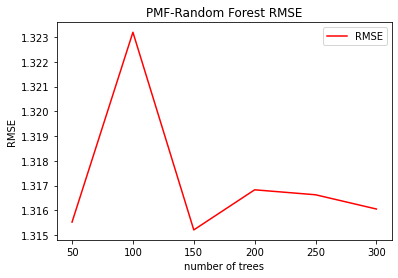

In [137]:
plt.plot(n_estimators_list, rmse_result_rftest,label = "RMSE", color="red")
plt.title('PMF-Random Forest RMSE')
plt.xlabel('number of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()

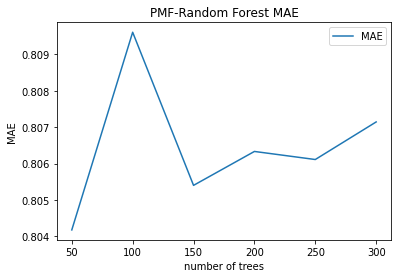

In [138]:
plt.plot(n_estimators_list, mae_result_rftest,label = "MAE")
plt.title('PMF-Random Forest MAE')
plt.xlabel('number of trees')
plt.ylabel('MAE')
plt.legend()
plt.show()

RandomizeSearchCV

In [139]:
n_estimators = [50,100, 150, 200, 250,300] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [140]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),param_distributions = random_grid) #n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1

In [141]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]})

In [142]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [50, 100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}  



In [143]:
randmf = RandomForestRegressor(n_estimators = 250, min_samples_split = 6, min_samples_leaf= 1, max_features = 'auto', max_depth= 10, bootstrap=True) 
randmf.fit(X_train, y_train) 

RandomForestRegressor(max_depth=10, min_samples_split=6, n_estimators=250)

In [144]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, "predicted_prob": randmf.predict(( X_test ))}) 
y_pred_rf1

,actual,predicted_prob
0,0.00,0.017851
1,0.00,1.733322
2,0.00,0.169403
3,0.00,0.481171
4,0.00,0.644584
...,...,...
1121,0.00,0.715965
1122,3.25,0.184169
1123,0.00,0.351125
1124,0.00,0.011136


In [145]:
#Test
prediction_rg_test = randmf.predict(X_test)
mse = mean_squared_error(y_test, prediction_rg_test)
rmse = mse**.5
mae = mean_absolute_error(y_test, prediction_rg_test)
print("Root Mean Square Error (RMSE) data test:")
print(rmse)
print
print("Mean Absolute Error (MAE) data test:")
print(mae)

Root Mean Square Error (RMSE) data test:
1.1964021080029623
Mean Absolute Error (MAE) data test:
0.787678951688429


In [146]:
#Train
prediction_rg_train = randmf.predict(X_train)
mse = mean_squared_error(y_train, prediction_rg_train)
rmse = mse**.5
mae = mean_absolute_error(y_train, prediction_rg_train)
print("Root Mean Square Error (RMSE) data train:")
print(rmse)
print
print("Mean Absolute Error (MAE) data train:")
print(mae)

Root Mean Square Error (RMSE) data train:
0.9431045114544506
Mean Absolute Error (MAE) data train:
0.6340002551326024


In [147]:
#y_pred_rf1.to_csv('predicted NNMF.csv', index=False)

GridSearchCV

In [148]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50,100, 150, 200, 250,300]}

In [149]:
g_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid) #cv = 3, n_jobs = 1, verbose = 0, return_train_score=True

In [150]:
g_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [151]:
print ('Grid Search: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', g_search.best_params_, ' \n')

Grid Search:  {'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50, 100, 150, 200, 250, 300]} 

Best Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}  



In [152]:
randmf_gs = RandomForestRegressor(n_estimators = 300, max_features = 'auto', max_depth= 10, bootstrap=True) 
randmf_gs.fit(X_train, y_train) 

RandomForestRegressor(max_depth=10, n_estimators=300)

In [153]:
y_pred_rf1GS = pd.DataFrame( { "actual": y_test, "predicted_prob": randmf_gs.predict(( X_test ))}) 
y_pred_rf1GS

,actual,predicted_prob
0,0.00,0.013603
1,0.00,1.784875
2,0.00,0.213487
3,0.00,0.400867
4,0.00,0.759519
...,...,...
1121,0.00,0.673424
1122,3.25,0.166563
1123,0.00,0.417773
1124,0.00,0.012506


In [154]:
#test
prediction_gs_test = randmf_gs.predict(X_test)
mse = mean_squared_error(y_test, prediction_gs_test)
rmse = mse**.5
mae = mean_absolute_error(y_test, prediction_gs_test)
print("Root Mean Square Error (RMSE) data test:")
print(rmse)
print
print("Mean Absolute Error (MAE) data test:")
print(mae)

Root Mean Square Error (RMSE) data test:
1.1978278326352463
Mean Absolute Error (MAE) data test:
0.7863263338937959


In [155]:
#train
prediction_gs_train = randmf_gs.predict(X_train)
mse = mean_squared_error(y_train, prediction_gs_train)
rmse = mse**.5
mae = mean_absolute_error(y_train, prediction_gs_train)
print("Root Mean Square Error (RMSE) data train:")
print(rmse)
print
print("Mean Absolute Error (MAE) data train:")
print(mae)

Root Mean Square Error (RMSE) data train:
0.9157779187906173
Mean Absolute Error (MAE) data train:
0.6139981053547098


# Rating Prediction

In [156]:
"""
def make_recommendation_newuser(item_sim, prediction, item_idx, k=5):
    '''
    item_idx ...... select an item
    k  ............ number of movies to recommend
    '''
    reco_item_df = pd.DataFrame(item_sim).iloc[item_idx, :] 
    user_prediction_df_user = pd.DataFrame(prediction)
    reco_item_df = pd.concat([reco_item_df,user_prediction_df_user, item_info], axis=1)   # merge list with the movie's title
    reco_item_df.columns = ['similarity','rating prediction','title']
    reco_item_df = reco_item_df.sort_values(by='similarity',ascending=False)
    reco_item_df.fillna(0,inplace=True)

    print('currently looking at movie:', reco_item_df.iloc[0]['title'])
    print('Recommended movies title: ')
    print(reco_item_df)         # returns the 5 unseen movies with the best predicted ratings print(reco_item_df)[1:k+1]



item_sim = cosine_similarity(matrix_R)                      # Use item features matrix to compute movie-to-movie similarity matrices
make_recommendation_newuser(item_sim, prediction, item_idx=0, k=500)
make_recommendation_newuser(item_sim, prediction, item_idx=4, k=5)
make_recommendation_newuser(item_sim, prediction, item_idx=638, k=5)
"""

"\ndef make_recommendation_newuser(item_sim, prediction, item_idx, k=5):\n    '''\n    item_idx ...... select an item\n    k  ............ number of movies to recommend\n    '''\n    reco_item_df = pd.DataFrame(item_sim).iloc[item_idx, :] \n    user_prediction_df_user = pd.DataFrame(prediction)\n    reco_item_df = pd.concat([reco_item_df,user_prediction_df_user, item_info], axis=1)   # merge list with the movie's title\n    reco_item_df.columns = ['similarity','rating prediction','title']\n    reco_item_df = reco_item_df.sort_values(by='similarity',ascending=False)\n    reco_item_df.fillna(0,inplace=True)\n\n    print('currently looking at movie:', reco_item_df.iloc[0]['title'])\n    print('Recommended movies title: ')\n    print(reco_item_df)         # returns the 5 unseen movies with the best predicted ratings print(reco_item_df)[1:k+1]\n\n\n\nitem_sim = cosine_similarity(matrix_R)                      # Use item features matrix to compute movie-to-movie similarity matrices\nmake_rec

In [157]:
item_sim = cosine_similarity(matrix_PMF)                      # Use item features matrix to compute movie-to-movie similarity matrices

In [158]:
def make_recommendation_newuser(item_sim, prediction, item_idx, k=5):
    '''
    item_idx ...... select an item
    k  ............ number of movies to recommend
    '''
    reco_item_df = pd.DataFrame(item_sim.round(2)).iloc[item_idx, :] 
    user_prediction_df_user = pd.DataFrame(prediction.round(2))
    #actual_df_user = pd.DataFrame(actual)
    reco_item_df = pd.concat([reco_item_df, user_prediction_df_user, item_info], axis=1)   # merge list with the movie's title
    reco_item_df.columns = ['similarity','rating prediction','title']
    reco_item_df = reco_item_df.sort_values(by='similarity',ascending=False)
    reco_item_df.fillna(0,inplace=True)
    df = pd.DataFrame(reco_item_df[1:k+1])
    
    print('currently looking at movie:', reco_item_df.iloc[0]['title'])
    print('Recommended movies title: ')
    #print(reco_item_df)         # returns the 5 unseen movies with the best predicted ratings print(reco_item_df)[1:k+1]

    return df



In [159]:
make_recommendation_newuser(item_sim, prediction_rg_test, item_idx=4, k=642)

currently looking at movie: My True Friend
Recommended movies title: 


,similarity,rating prediction,title
289,1.0,1.70,Raat Akeli Hai
62,1.0,2.27,Generasi 90an: Melankolia
609,1.0,1.22,Angels & Demons
167,1.0,0.21,Set It Up
73,1.0,1.96,Space Sweepers
...,...,...,...
232,0.0,0.39,Bright
233,0.0,0.21,Death Note
234,0.0,0.20,Okja
235,0.0,0.36,5 Cowok Jagoan


In [160]:
make_recommendation_newuser(item_sim, prediction_rg_test, item_idx=0, k=642)

currently looking at movie: Words Bubble Up Like Soda Pop
Recommended movies title: 


,similarity,rating prediction,title
482,0.0,0.27,Cloudy with a Chance of Meatballs 2
424,0.0,0.88,Earth to Echo
425,0.0,0.20,Silent Hill: Revelation
426,0.0,0.06,Soul Surfer
427,0.0,2.60,Sour Grapes
...,...,...,...
215,0.0,0.11,The Pursuit
216,0.0,0.15,The Basement
217,0.0,0.18,The Breadwinner
218,0.0,0.53,The Bye Bye Man


In [161]:
coba = make_recommendation_newuser(item_sim, prediction_rg_test, item_idx=2, k=642)
coba.to_csv('testhasil.csv', index=False)

currently looking at movie: Wind River
Recommended movies title: 
